<a href="https://colab.research.google.com/github/jwlee95/OpenECG/blob/master/%EC%8B%AC%EC%A0%84%EB%8F%84_%EC%8B%A0%ED%98%B8%EB%A5%BC_%EA%B7%B8%EB%A6%AC%EB%8A%94_%EC%BD%94%EB%93%9C%EB%8A%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

주어진 정보를 바탕으로 심전도(ECG) 신호를 그리는 파이썬 코드를 작성하려면 일반적으로 **`numpy`**와 **`matplotlib`** 라이브러리가 사용됩니다.

`numpy`는 신호 데이터를 생성하거나 처리하는 데 유용하고, `matplotlib`은 이 데이터를 시각화하여 그래프로 그리는 데 사용됩니다.

---

### ECG 신호 시뮬레이션 및 플로팅 코드

다음은 단순화된 ECG 신호를 시뮬레이션하고 이를 플로팅하는 기본적인 파이썬 코드입니다. 실제 ECG 신호는 훨씬 복잡하지만, 이 코드는 기본적인 P파, QRS 복합체, T파를 모방합니다.

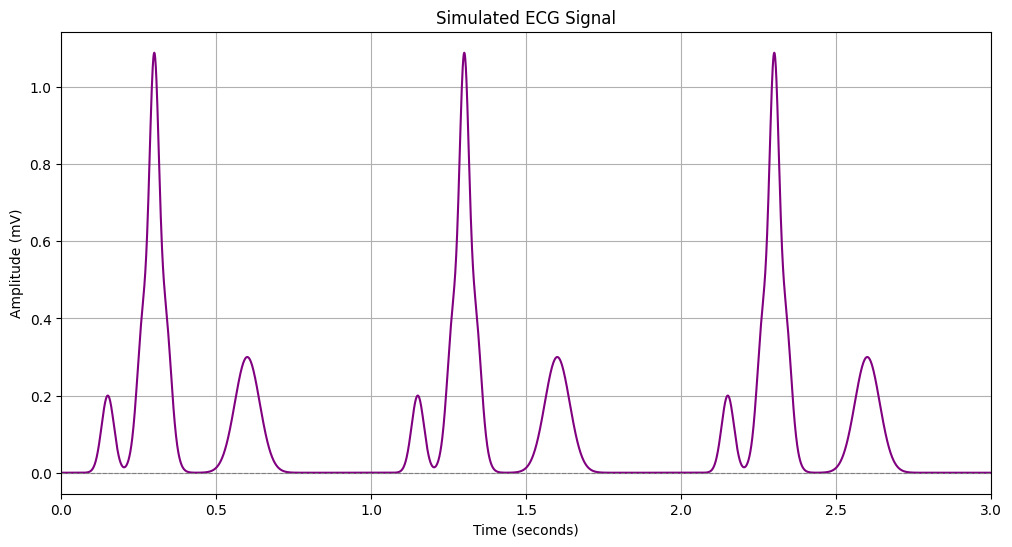

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 시간 벡터 생성 (초 단위)
# 10초 동안 1000Hz 샘플링 주파수로 신호 생성
sampling_rate = 1000  # Hz
duration = 10        # seconds
time = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# 2. ECG 신호 구성 요소 정의 (간략화된 모델)
# 실제 ECG 신호는 훨씬 복잡합니다. 여기서는 가우시안 함수를 사용하여 근사합니다.

def gaussian(x, mu, sigma, amplitude):
    return amplitude * np.exp(-0.5 * ((x - mu) / sigma)**2)

ecg_signal = np.zeros_like(time)

# 심박수 시뮬레이션 (분당 60회 = 1초에 한 번 심박)
heart_rate_bpm = 60
beat_interval = 60 / heart_rate_bpm # 초당 심박 간격

# 여러 심박 시뮬레이션
for i in range(int(duration / beat_interval)):
    beat_start_time = i * beat_interval

    # P파 (심방 탈분극)
    # R파를 기준으로 P파가 선행함
    p_wave_mu = beat_start_time + 0.15 # R파 발생 시간보다 0.15초 전
    ecg_signal += gaussian(time, p_wave_mu, 0.02, 0.2)

    # QRS 복합체 (심실 탈분극) - Q, R, S 파
    # R파 (가장 두드러진 피크)
    r_wave_mu = beat_start_time + 0.3
    ecg_signal += gaussian(time, r_wave_mu, 0.03, 1.5)

    # Q파 (R파 직전)
    q_wave_mu = beat_start_time + 0.28
    ecg_signal -= gaussian(time, q_wave_mu, 0.015, 0.5)

    # S파 (R파 직후)
    s_wave_mu = beat_start_time + 0.32
    ecg_signal -= gaussian(time, s_wave_mu, 0.015, 0.5)

    # T파 (심실 재분극)
    t_wave_mu = beat_start_time + 0.6
    ecg_signal += gaussian(time, t_wave_mu, 0.04, 0.3)

    # 노이즈 추가 (선택 사항)
    #noise = np.random.normal(0, 0.05, len(time))
    #ecg_signal += noise

# 3. 신호 플로팅
plt.figure(figsize=(12, 6))
plt.plot(time, ecg_signal, color='purple', linewidth=1.5)
plt.title('Simulated ECG Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (mV)')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) # 기준선 표시
plt.xlim(0, 3) # 처음 3초만 보여줘서 심장 박동을 더 명확하게 볼 수 있도록 설정
plt.show()

---

### 코드 설명

* **`numpy`**:
    * **`np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)`**: 주어진 시간 범위(`0`부터 `duration`까지) 동안 `sampling_rate`에 따라 균일하게 분포된 시간 포인트를 생성합니다.
    * **`np.zeros_like(time)`**: `time` 배열과 동일한 형태의 0으로 채워진 배열을 생성하여 ECG 신호를 저장할 공간을 만듭니다.
    * **`gaussian` 함수**: P파, QRS 복합체, T파를 모델링하기 위해 가우시안(정규 분포) 함수를 사용합니다. 이 함수는 특정 지점(`mu`, 평균)에서 가장 높은 진폭(`amplitude`)을 가지고, `sigma`(표준편차)에 따라 너비가 결정됩니다.
    * **`np.random.normal`**: 실제 ECG 신호처럼 약간의 무작위 노이즈를 추가합니다.

* **`matplotlib.pyplot`**:
    * **`plt.figure(figsize=(12, 6))`**: 그래프의 크기를 설정합니다.
    * **`plt.plot(time, ecg_signal, ...)`**: 시간(`time`)에 따른 ECG 신호(`ecg_signal`)를 선 그래프로 그립니다. `color`와 `linewidth`를 통해 선의 색상과 두께를 조절할 수 있습니다.
    * **`plt.title()`**, **`plt.xlabel()`**, **`plt.ylabel()`**: 그래프의 제목과 X, Y축 레이블을 설정합니다.
    * **`plt.grid(True)`**: 그래프에 격자를 추가하여 값을 읽기 쉽게 합니다.
    * **`plt.axhline(0, ...)`**: Y=0에 기준선을 그려 신호의 기준점을 시각화합니다.
    * **`plt.xlim(0, 3)`**: X축(시간) 범위를 설정하여 전체 10초 대신 처음 3초만 보여주어 개별 심장 박동을 더 자세히 볼 수 있게 합니다. 필요에 따라 이 값을 조절하여 전체 신호를 볼 수 있습니다.
    * **`plt.show()`**: 생성된 그래프를 화면에 표시합니다.

---

### 추가 고려사항

* **실제 ECG 데이터**: 이 코드는 시뮬레이션된 데이터이므로 실제 ECG 신호와는 다릅니다. 실제 ECG 신호는 복잡한 생리학적 과정을 반영하며, 훨씬 다양한 형태와 변동성을 가집니다. 실제 데이터를 분석하려면 PhysioNet 같은 데이터베이스에서 공개된 ECG 데이터를 사용해야 합니다.
* **신호 처리**: 실제 ECG 신호는 종종 노이즈(근전도, 전원선 노이즈 등)를 포함하므로, 필터링, 기준선 드리프트 제거 등 다양한 신호 처리 기법이 필요합니다.
* **고급 모델링**: 더 사실적인 ECG 신호를 시뮬레이션하려면 심장의 전기적 활동을 더 정교하게 모델링하는 방법이 필요합니다.

이 코드는 ECG 신호의 기본적인 형태와 플로팅 방법을 이해하는 데 좋은 시작점이 될 것입니다.